# Nicholson-Bailey Host-Parasitoid Model

The Nicholson-Bailey model is the fundamental "null model" for studying host-parasitoid interactions in discrete time. It describes a system where generations do not overlap (e.g., annual insects).

---

## 1. The Biological Scenario
Imagine a closed ecosystem with two species:
1.  **The Host ($H$):** An insect (e.g., a caterpillar) that feeds on plants. Its goal is to survive and lay eggs for the next year.
2.  **The Parasitoid ($P$):** A specialized wasp. It searches for hosts to lay its eggs *inside* them. The developing wasp larva eats the host from the inside out, killing it.

**The "Turn-Based" Lifecycle:**
Since these insects have annual lifecycles, events happen in steps:
* **Step 1:** Hosts emerge and are vulnerable to attack.
* **Step 2:** Parasitoids search randomly for hosts.
* **Step 3:**
    * **Found Hosts:** Die. They become the "incubators" for next year's parasitoids.
    * **Escaped Hosts:** Survive. They reproduce and create next year's hosts.

---

## 2. The Notation (Vocabulary)

| Symbol | Definition | Meaning |
| :--- | :--- | :--- |
| **$t$** | Generation | Time steps (e.g., Year 0, Year 1, Year 2). |
| **$H_t$** | Host Density | The number of hosts at the start of generation $t$. |
| **$P_t$** | Parasitoid Density | The number of searching parasitoids at generation $t$. |
| **$\lambda$** | Host Growth Rate | The **finite rate of increase**. If there were 0 wasps, the host population would multiply by $\lambda$ every year ($H_{t+1} = \lambda H_t$). |
| **$a$** | Area of Discovery | **Search Efficiency**. Imagine the parasitoid blindly sweeping an area $a$. Any host in that area is found. A higher $a$ means the wasp is more dangerous. |
| **$c$** | Clutch Size | The number of parasitoids that emerge from one dead host. Usually $c=1$. |

---

## 3. Deriving the Equations (Step-by-Step)

---

### Part A: The Equation for Hosts ($H_{t+1}$)
The number of hosts next year is the number of **Potential Offspring** multiplied by the **Probability of Survival**.

1.  **Potential Growth:**
    If no parasitoids existed, the population would grow exponentially:
    $$\text{Potential} = \lambda H_t$$

2.  **Probability of Escape ($P_{\text{escape}}$):**
    Nicholson and Bailey assumed parasitoids search **randomly**. This results in a Poisson distribution of attacks.
    * The average number of encounters per host is the search efficiency times the number of searchers: $\mu = a P_t$.
    * In a Poisson distribution, the probability of *zero* events (zero attacks) is $e^{-\mu}$.
    $$P_{\text{escape}} = e^{-a P_t}$$

3.  **The Result:**
    $$H_{t+1} = (\text{Potential Growth}) \times (\text{Prob of Escape})$$
    $$H_{t+1} = \lambda H_t e^{-a P_t}$$

### Part B: The Equation for Parasitoids ($P_{t+1}$)
New parasitoids are born *only* from the hosts that were caught.

1.  **Probability of Being Caught:**
    If the chance of escaping is $e^{-a P_t}$, the chance of being found is the remainder:
    $$P_{\text{caught}} = 1 - e^{-a P_t}$$

2.  **Number of Hosts Infected:**
    We apply this probability to the current host population $H_t$:
    $$N_{\text{infected}} = H_t (1 - e^{-a P_t})$$

3.  **The Result:**
    Each infected host produces $c$ new wasps:
    $$P_{t+1} = c H_t (1 - e^{-a P_t})$$

---

## 4. Model Behavior: Instability
The defining feature of the Nicholson-Bailey model is **Divergent Oscillations**. It is inherently unstable.

1.  **Growth:** Hosts increase, providing more food for parasitoids.
2.  **Overshoot:** Parasitoids increase so much that they find almost *every* host.
3.  **Crash:** Next year, there are almost no hosts ($H \approx 0$). Consequently, the massive parasitoid population starves and crashes ($P \approx 0$).
4.  **Extinction:** Mathematically, the waves get bigger and bigger until the populations hit zero.

### Why is this "Failure" Useful?
Because real host-parasitoid systems *are* stable, this model proves that **random search alone is not enough for stability**. It forces ecologists to look for stabilizing mechanisms found in nature, such as:
* **Refuges:** Hiding spots where $P(\text{escape}) = 1$.
* **Carrying Capacity:** Limits on host growth (Logistic growth).
* **Interference:** Parasitoids wasting time fighting each other.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

In [31]:
def nicholson_bailey_step(H, P, lam, a, c=1.0):
    """
    Calculates the populations for the next generation.
    """
    # Probability that a host escapes parasitism
    prob_escape = np.exp(-a * P)
    
    # 1. Next Generation Hosts:
    # (Current Hosts) * (Reproduction Rate) * (Prob of Escape)
    H_next = lam * H * prob_escape
    
    # 2. Next Generation Parasitoids:
    # (Hosts Parasitized) * (Conversion Efficiency)
    # Hosts Parasitized = H * (1 - prob_escape)
    P_next = c * H * (1 - prob_escape)
    
    return H_next, P_next

### Path to Extinction

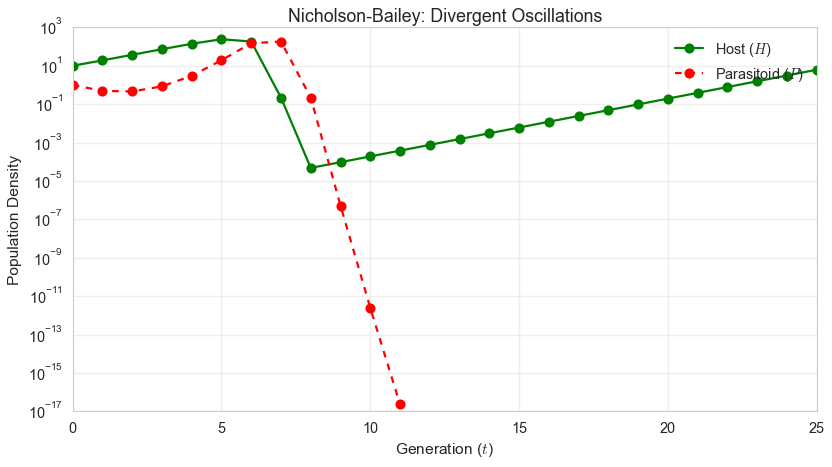

In [32]:
generations = 25
H0 = 10.0      # Initial Hosts
P0 = 1.0       # Initial Parasitoids

lam = 2.0      # Host growth rate (Doubles every gen if no parasitoids)
a = 0.05       # Search efficiency
c = 1.0        # One parasitoid per host

H_ts = [H0]
P_ts = [P0]
for t in range(generations):
    H_curr, P_curr = H_ts[-1], P_ts[-1]
    H_new, P_new = nicholson_bailey_step(H_curr, P_curr, lam, a, c)
    
    H_ts.append(H_new)
    P_ts.append(P_new)


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(len(H_ts)), H_ts, 'g-o', linewidth=2, label='Host ($H$)')
ax.plot(range(len(P_ts)), P_ts, 'r--o', linewidth=2, label='Parasitoid ($P$)')

ax.set_title('Nicholson-Bailey: Divergent Oscillations', fontsize=16)
ax.set_xlabel('Generation ($t$)', fontsize=14)
ax.set_ylabel('Population Density', fontsize=14)
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3, which="both")

plt.show()

### Phase Diagram

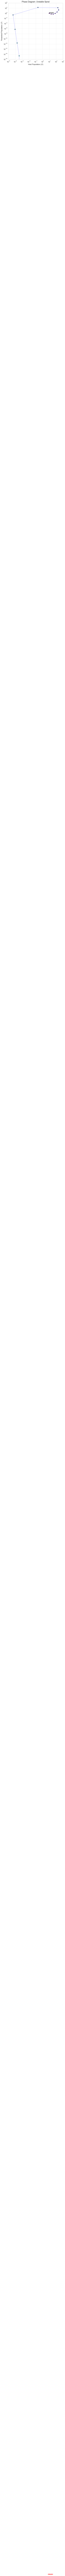

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(H_ts, P_ts, 'b-', linewidth=1, alpha=0.5)
ax.scatter(H_ts, P_ts, c=range(len(H_ts)), cmap='viridis', s=50, zorder=5)

ax.text(H_ts[0], P_ts[0], 'START', fontsize=12, fontweight='bold')
ax.text(H_ts[-1], P_ts[-1], 'CRASH', fontsize=12, fontweight='bold', color='red')

ax.set_title('Phase Diagram: Unstable Spiral', fontsize=16)
ax.set_xlabel('Host Population ($H$)', fontsize=14)
ax.set_ylabel('Parasitoid Population ($P$)', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True, alpha=0.3)

plt.show()

### Stabilizing Model

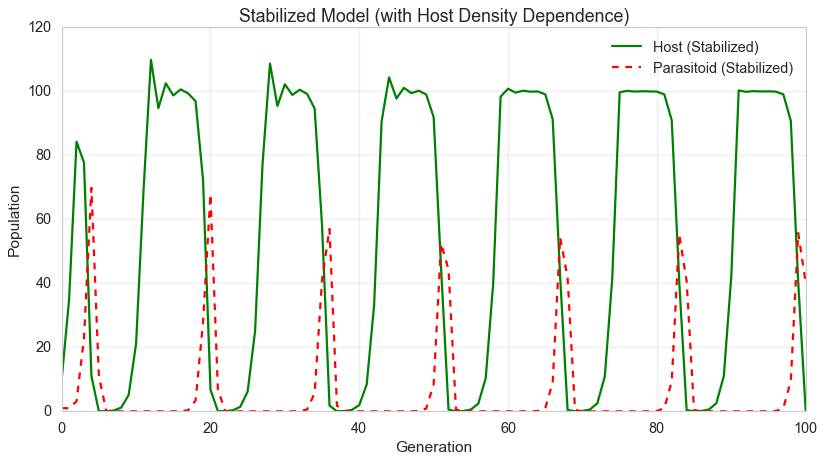

In [37]:
def stabilized_NB_step(H, P, r, K, a):
    """
    Nicholson-Bailey with Density Dependent Host Growth (Ricker).
    """
    # Term inside exponential: Growth - Crowding - Parasitism
    exponent = r * (1 - H/K) - a * P
    
    H_next = H * np.exp(exponent)
    P_next = H * (1 - np.exp(-a * P)) # Parasitoids derived from infected hosts
    
    return H_next, P_next


gen_stable = 100
r_val = 1.5   # Intrinsic growth rate (ln lambda)
K_val = 100   # Carrying Capacity
a_val = 0.1

H_stab = [10]
P_stab = [1]

for t in range(gen_stable):
    H_new, P_new = stabilized_NB_step(H_stab[-1], P_stab[-1], r_val, K_val, a_val)
    H_stab.append(H_new)
    P_stab.append(P_new)


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(H_stab, 'g-', linewidth=2, label='Host (Stabilized)')
ax.plot(P_stab, 'r--', linewidth=2, label='Parasitoid (Stabilized)')

ax.set_title('Stabilized Model (with Host Density Dependence)', fontsize=16)
ax.set_xlabel('Generation', fontsize=14)
ax.set_ylabel('Population', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()